In [ ]:
import random

def generate_random_graph_adj_matrix(n, p):
    graph = [[0 for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i + 1, n):
            r = random.random()
            if r < p:
                graph[i][j] = 1
                graph[j][i] = 1
    return graph

example_graph_matrix = generate_random_graph_adj_matrix(5, 0.5)
for i in example_graph_matrix:
  print(i)

[0, 0, 1, 1, 0]
[0, 0, 1, 0, 1]
[1, 1, 0, 0, 0]
[1, 0, 0, 0, 0]
[0, 1, 0, 0, 0]


In [12]:
def is_valid_coloring_matrix(graph, coloring, vertex):                                        #|
    for i in range(vertex):                                                                   #|
        if graph[vertex][i] == 1 and coloring[vertex] == coloring[i]:                         #|->O(|V|)
            return False                                                                      #|
    return True                                                                               #|

from itertools import product

def brute_force_graph_coloring_matrix(graph, num_colors):                                     #|
    n = len(graph)                                                                            #|
    for coloring in product(range(num_colors), repeat=n): #|->O(num_colors^(|V|))             #|->O(|V|) * num_colors^(|V|))
        if is_valid_coloring_matrix(graph, coloring):                                         #|
            return coloring                                                                   #|
    return None                                                                               #|

# Overall complexity for brute_force_graph_coloring_matrix: O(|V|) * num_colors^(|V|))

In [ ]:
num_tests = 15
adj_matrix_size = 5

graph_results = []

print(f"Matrix sizes: {adj_matrix_size}")
print("-----------------------")

for _ in range(num_tests):
    graph = generate_random_graph_adj_matrix(adj_matrix_size, 0.5)
    for i in graph:
      print(i)
    coloring_result = brute_force_graph_coloring_matrix(graph, 3)
    graph_results.append((graph, coloring_result))
    if coloring_result is None:
      print("Coloring failed!")
    else:
      print("Coloring successful!")
    print("-----------------------")


success_count = sum(1 for _, result in graph_results if result is not None)
failure_count = num_tests - success_count

print(f"Total tests run: {num_tests}")
print(f"Number of successful colorings: {success_count}")
print(f"Number of failures: {failure_count}")

Matrix sizes: 5
-----------------------
[0, 0, 1, 1, 1]
[0, 0, 1, 0, 1]
[1, 1, 0, 0, 1]
[1, 0, 0, 0, 0]
[1, 1, 1, 0, 0]
Coloring successful!
-----------------------
[0, 0, 0, 1, 0]
[0, 0, 0, 1, 0]
[0, 0, 0, 1, 1]
[1, 1, 1, 0, 0]
[0, 0, 1, 0, 0]
Coloring successful!
-----------------------
[0, 0, 1, 0, 1]
[0, 0, 0, 1, 0]
[1, 0, 0, 1, 1]
[0, 1, 1, 0, 0]
[1, 0, 1, 0, 0]
Coloring successful!
-----------------------
[0, 0, 0, 1, 0]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 1]
[1, 1, 0, 0, 0]
[0, 0, 1, 0, 0]
Coloring successful!
-----------------------
[0, 0, 1, 1, 1]
[0, 0, 0, 0, 0]
[1, 0, 0, 1, 0]
[1, 0, 1, 0, 1]
[1, 0, 0, 1, 0]
Coloring successful!
-----------------------
[0, 1, 0, 1, 1]
[1, 0, 1, 1, 1]
[0, 1, 0, 1, 1]
[1, 1, 1, 0, 0]
[1, 1, 1, 0, 0]
Coloring successful!
-----------------------
[0, 1, 0, 1, 1]
[1, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[1, 0, 0, 0, 1]
[1, 0, 0, 1, 0]
Coloring successful!
-----------------------
[0, 1, 1, 1, 1]
[1, 0, 1, 0, 0]
[1, 1, 0, 1, 1]
[1, 0, 1, 0, 1]
[1, 0, 1, 1, 0]
Color

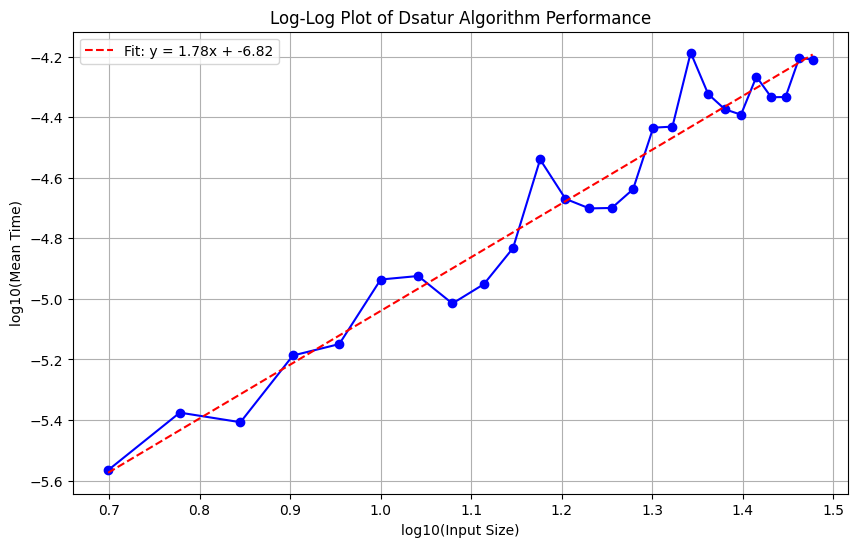

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'InputSize': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'MeanTime': [2.71792e-06, 4.20936e-06, 3.91295e-06, 6.4996e-06, 7.08963e-06, 1.15832e-05, 1.18975e-05, 9.65248e-06, 1.11806e-05, 1.47029e-05, 2.88617e-05, 2.13927e-05, 1.9894e-05, 1.99614e-05, 2.30154e-05, 3.67579e-05, 3.70508e-05, 6.49988e-05, 4.74479e-05, 4.22667e-05, 4.05866e-05, 5.41761e-05, 4.63283e-05, 4.64062e-05, 6.26463e-05, 6.16179e-05]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(np.log10(df['InputSize']), np.log10(df['MeanTime']), marker='o', linestyle='-', color='b')
plt.xlabel('log10(Input Size)')
plt.ylabel('log10(Mean Time)')
plt.title('Log-Log Plot of Dsatur Algorithm Performance')
plt.grid(True)

log_input_size = np.log10(df['InputSize'])
log_mean_time = np.log10(df['MeanTime'])
coefficients = np.polyfit(log_input_size, log_mean_time, 1)
poly = np.poly1d(coefficients)
plt.plot(log_input_size, poly(log_input_size), linestyle='--', color='r', label=f'Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
plt.legend()

plt.show()



    // Test case 1: Empty adjacency matrix
    cout << "Test case 1: Empty adjacency matrix\n";
    cout << "Description: This test case examines the behavior of the algorithm when provided with an empty graph.\n";
    cout << "Graph: {}\n";
    cout << "Expected output: 0\n";
    vector<vector<int>> matrix1 = {};
    Graph graph1 = adj_matrix_to_graph(matrix1);
    cout << "Chromatic Number (DSatur): " << graph1.DSatur() << "\n\n";

    // Test case 2: Full adjacency matrix
    cout << "Test case 2: Full adjacency matrix\n";
    cout << "Description: This test case verifies how the algorithm handles a graph where every vertex is connected to every other vertex.\n";
    cout << "Graph: {{0, 1, 1}, {1, 0, 1}, {1, 1, 0}}\n";
    cout << "Expected output: 3\n";
    vector<vector<int>> matrix2 = {{0, 1, 1}, {1, 0, 1}, {1, 1, 0}};
    Graph graph2 = adj_matrix_to_graph(matrix2);
    cout << "Chromatic Number (DSatur): " << graph2.DSatur() << "\n\n";

    // Test case 3: One adjacency
    cout << "Test case 3: One adjacency\n";
    cout << "Description: This test case examines the behavior of the algorithm when presented with a graph having only one edge.\n";
    cout << "Graph: {{0, 1, 0}, {1, 0, 0}, {0, 0, 0}}\n";
    cout << "Expected output: 2\n";
    vector<vector<int>> matrix3 = {{0, 1, 0}, {1, 0, 0}, {0, 0, 0}};
    Graph graph3 = adj_matrix_to_graph(matrix3);
    cout << "Chromatic Number (DSatur): " << graph3.DSatur() << "\n\n";
}

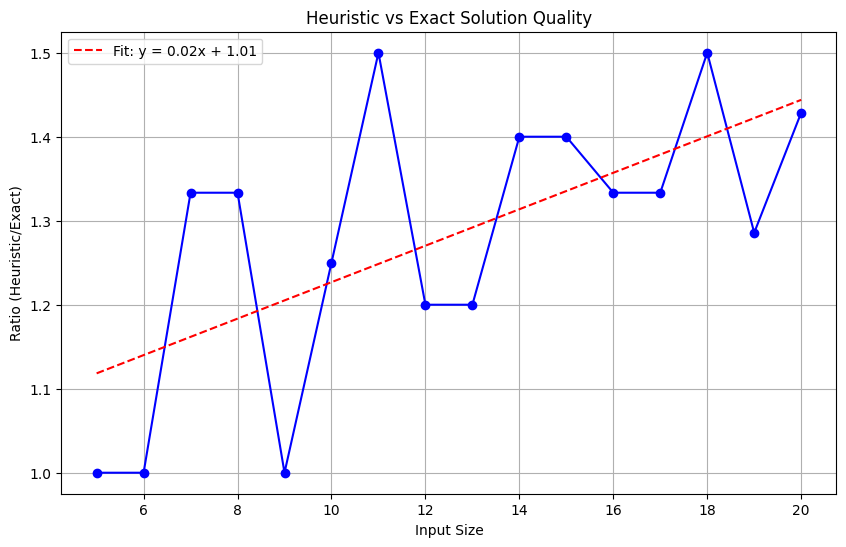

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for demonstration
data = {
    'Input Size': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Chromatic Number (Exact)': [2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7],
    'Chromatic Number (Heuristic)': [2, 3, 4, 4, 4, 5, 6, 6, 6, 7, 7, 8, 8, 9, 9, 10]
}

df = pd.DataFrame(data)
df['Ratio (Heuristic/Exact)'] = df['Chromatic Number (Heuristic)'] / df['Chromatic Number (Exact)']

# Plotting the Heuristic vs Exact Solution Quality
plt.figure(figsize=(10, 6))
plt.plot(df['Input Size'], df['Ratio (Heuristic/Exact)'], marker='o', linestyle='-', color='b')
plt.xlabel('Input Size')
plt.ylabel('Ratio (Heuristic/Exact)')
plt.title('Heuristic vs Exact Solution Quality')
plt.grid(True)

# Fit a line to the data
coefficients = np.polyfit(df['Input Size'], df['Ratio (Heuristic/Exact)'], 1)
poly = np.poly1d(coefficients)
plt.plot(df['Input Size'], poly(df['Input Size']), linestyle='--', color='r', label=f'Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
plt.legend()

# Show plot
plt.show()
